<a href="https://colab.research.google.com/github/13RENDA/GE-Vernova-Capstone/blob/main/Final_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Data Clean**

In [ ]:
df=pd.read_excel("/content/drive/MyDrive/Capstone GE/Data_2.7/Orange.xlsx")

In [ ]:
df.dtypes

In [ ]:
new_data = df.drop('Classification', axis=1)
new_data['Holiday/Weekend']=new_data['Holiday/Weekend'].astype(int)
new_data = new_data.drop('RecordDateTime', axis=1)
new_data = new_data.drop('HourlyPrecipitation', axis=1)
new_data = new_data.drop('HourlySkyConditions', axis=1)

In [ ]:
new_data.dtypes

Holiday/Weekend                int64
% Power Outage               float64
HourlyAltimeterSetting       float64
HourlyDewPointTemperature    float64
HourlyDryBulbTemperature     float64
HourlySeaLevelPressure       float64
HourlyRelativeHumidity       float64
HourlyStationPressure        float64
HourlyVisibility             float64
HourlyWetBulbTemperature     float64
HourlyWindDirection            int64
HourlyWindSpeed                int64
dtype: object

# **Outliers**

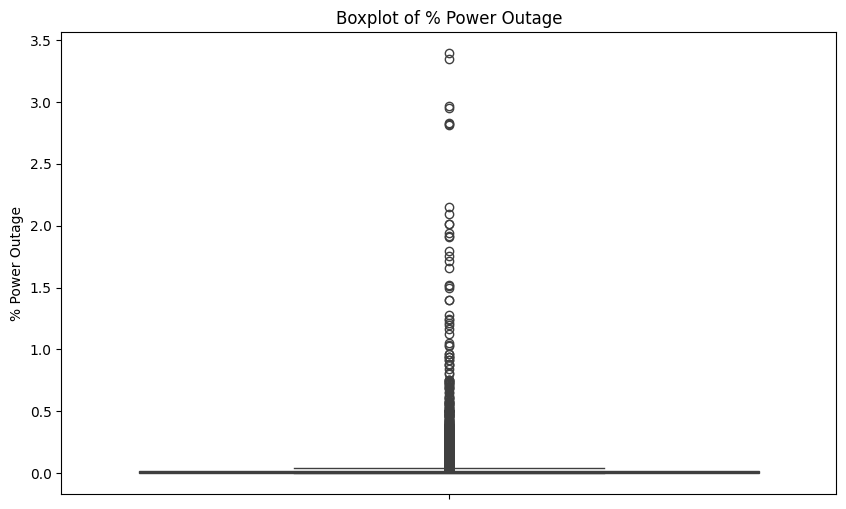

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_data['% Power Outage'])
plt.title('Boxplot of % Power Outage')
plt.xticks(rotation=45)
plt.show()

In [ ]:
q1 = new_data['% Power Outage'].quantile(0.25)
q3 = new_data['% Power Outage'].quantile(0.75)
iqr = q3 - q1
threshold = 1.5 * iqr
outliers = (new_data['% Power Outage'] < (q1 - threshold)) | (new_data['% Power Outage'] > (q3 + threshold))
cleaned_new_data = new_data[~outliers]

<Axes: ylabel='% Power Outage'>

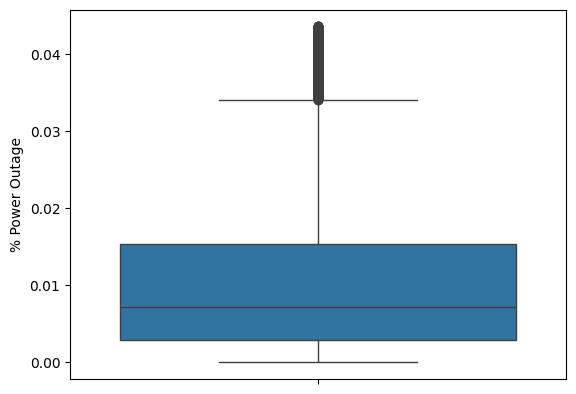

In [ ]:
sns.boxplot(data=cleaned_new_data['% Power Outage'])

### Power Outage Plot

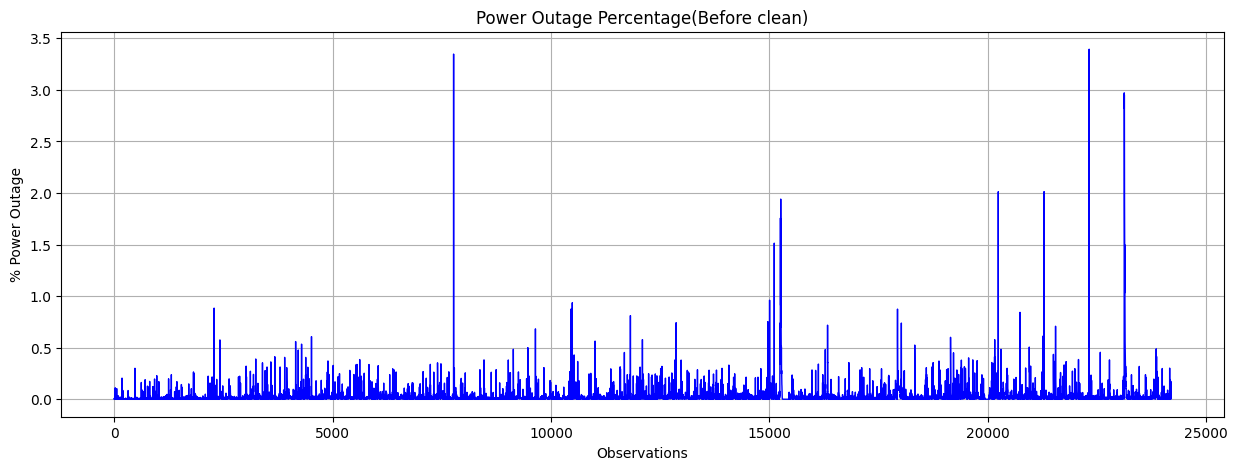

In [ ]:
# Adjusting the code to create a finer line in the plot
plt.figure(figsize=(15, 5))  # Set the figure size as needed
plt.plot(new_data['% Power Outage'], linestyle='-', linewidth=1, color='blue')  # Plotting with a finer line
plt.title('Power Outage Percentage(Before clean)')  # Set the title of the plot
plt.ylabel('% Power Outage')  # Label the y-axis
plt.xlabel('Observations')  # Label the x-axis as needed, or use the default
plt.grid(True)  # Add a grid for easier readability
plt.show()  # Display the plot

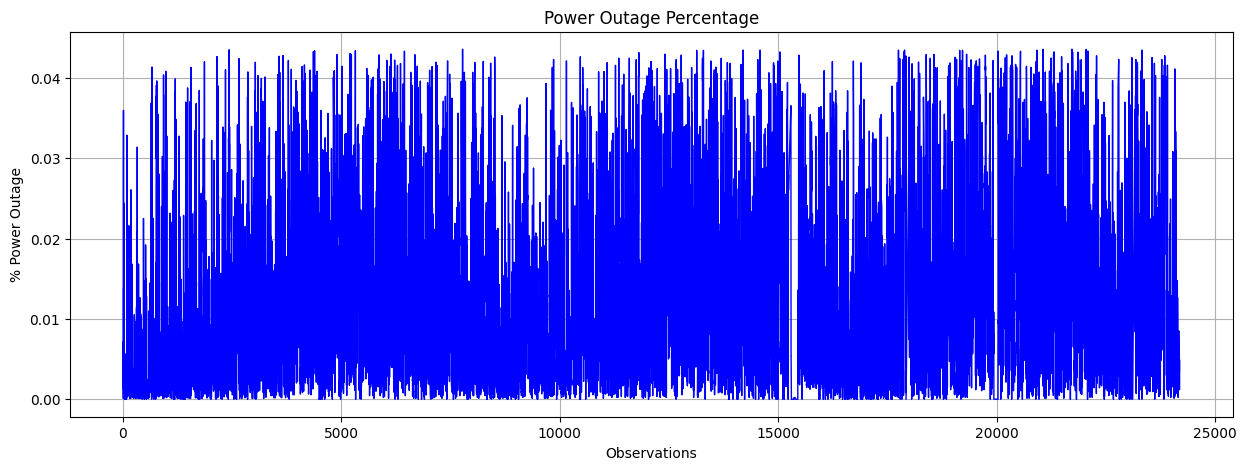

In [ ]:
# Adjusting the code to create a finer line in the plot
plt.figure(figsize=(15, 5))  # Set the figure size as needed
plt.plot(cleaned_new_data['% Power Outage'], linestyle='-', linewidth=1, color='blue')  # Plotting with a finer line
plt.title('Power Outage Percentage')  # Set the title of the plot
plt.ylabel('% Power Outage')  # Label the y-axis
plt.xlabel('Observations')  # Label the x-axis as needed, or use the default
plt.grid(True)  # Add a grid for easier readability
plt.show()  # Display the plot


### Confusion Matrix

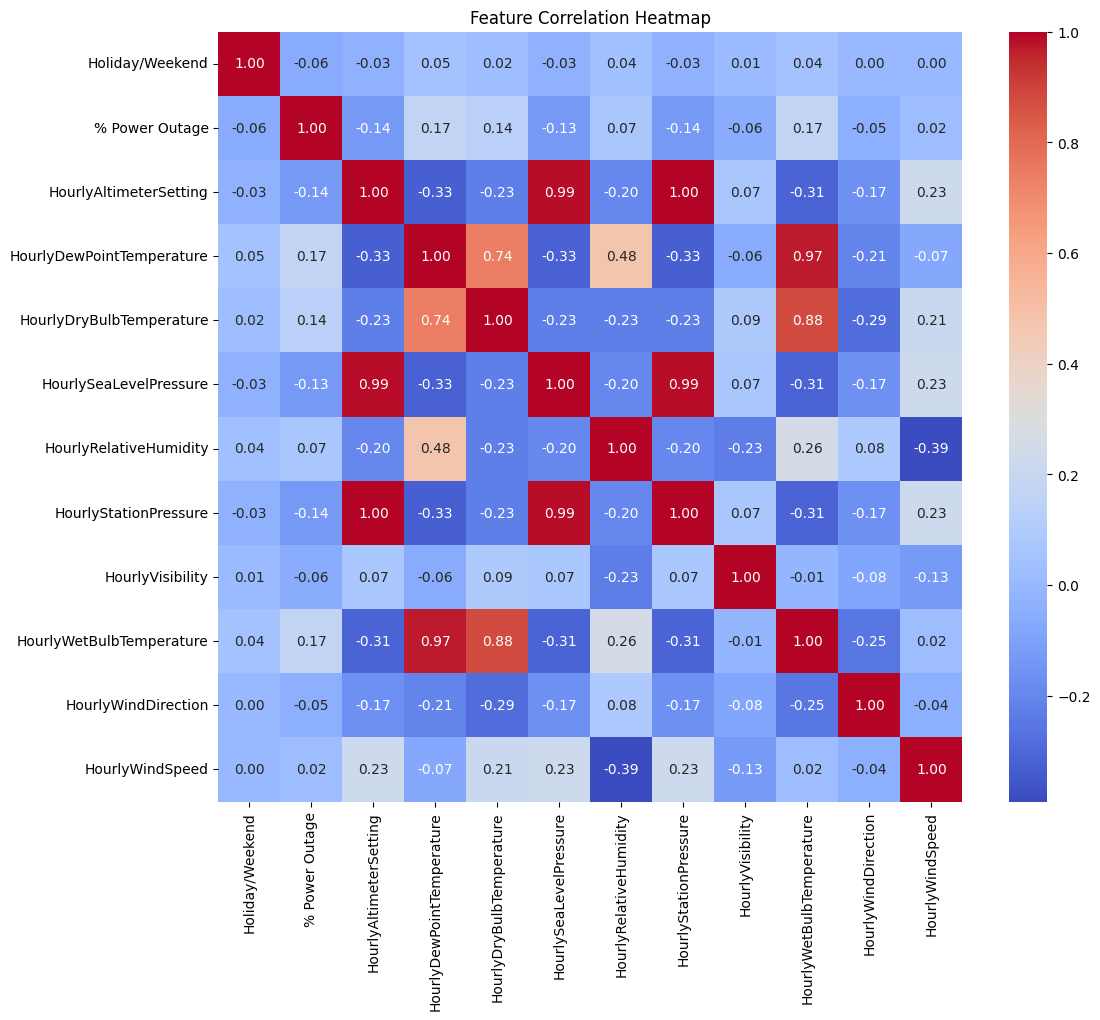

In [ ]:

corr = cleaned_new_data.corr()

# Plot the heatmap
plt.figure(figsize=(12,10))  # You can adjust the size as needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

# **Data Normalization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
cleaned_new_data_scaled = scaler.fit_transform(cleaned_new_data)
cleaned_new_data_scaled = pd.DataFrame(cleaned_new_data_scaled, columns=cleaned_new_data.columns)
y_scaled = cleaned_new_data_scaled['% Power Outage']
x_scaled = cleaned_new_data_scaled.drop('% Power Outage', axis=1)

# **Divide Training Set**

In [ ]:
# split data with normalization
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=42)

In [ ]:
# split data without normalization
y_cleaned = cleaned_new_data['% Power Outage']
x_cleaned = cleaned_new_data.drop('% Power Outage', axis=1)

x_train, x_test, y_train, y_test = train_test_split(x_cleaned, y_cleaned, test_size=0.3, random_state=42)

# **Model Training**

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
models = {
    "Decision Tree Regression": DecisionTreeRegressor(),
    "Random Forest Regression": RandomForestRegressor(max_depth=20,min_samples_leaf=2, min_samples_split=5, n_estimators=150),
    "Gradient Boosting Regression": GradientBoostingRegressor(),
    "AdaBoost Regression": AdaBoostRegressor(),
    "XGBoost Regression": XGBRegressor(),
    "LightGBM Regression": LGBMRegressor()
}

In [ ]:
mean_error_model= []
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    r2 = r2_score(y_test, predictions)
    print(f"{name} Performance:")
    print("R2 Score:", r2)
    # Calculate the error between each predicted value and the true value and add it up
    error_sum = sum([abs(pred - true) for pred, true in zip(predictions, y_train)])
    # Calculate the mean error
    mean_error = error_sum / len(predictions)
    mean_error_model.append(mean_error)
    print("Mean Error：", mean_error)

Decision Tree Regression Performance:
R2 Score: -0.723520646147428
Mean Error： 0.010562543024894447
Random Forest Regression Performance:
R2 Score: 0.1305590728329482
Mean Error： 0.008356781977728791
Gradient Boosting Regression Performance:
R2 Score: 0.07952655382518026
Mean Error： 0.00808594902200168
AdaBoost Regression Performance:
R2 Score: -0.07972275884734992
Mean Error： 0.009187762555033072
XGBoost Regression Performance:
R2 Score: 0.07226924784228417
Mean Error： 0.008471963104999852
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 762
[LightGBM] [Info] Number of data points in the train set: 15339, number of used features: 8
[LightGBM] [Info] Start training from score 0.010439
LightGBM Regression Performance:
R2 Score: 0.10314996090831197
Mean Error： 0.0081646473539147


# **Final the Best Parameter**

In [ ]:
from sklearn.model_selection import GridSearchCV
import time

In [ ]:
start_time = time.time()
rf_model = RandomForestRegressor()
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_rf_model = grid_search.best_estimator_

predictions = best_rf_model.predict(x_test)
r2 = r2_score(y_test, predictions)
print("R2 Score:", r2)

end_time = time.time()
total_time = (end_time - start_time)/60
print("Time：", total_time, "min")

# **Baseline**

In [ ]:
mean_y = sum(y_train) / len(y_train)

error_sum = sum([abs(value - mean_y) for value in y_train])

mean_error_baseline = error_sum / len(y_train)

print("Mean Error：", mean_error_baseline)

NameError: name 'y_train' is not defined

In [ ]:
mean_error_model = [0.01025, 0.01025, 0.010812, 0.010812, 0.016239, 0.01263, 0.00733889]

In [ ]:
mean_error_baseline=0.028

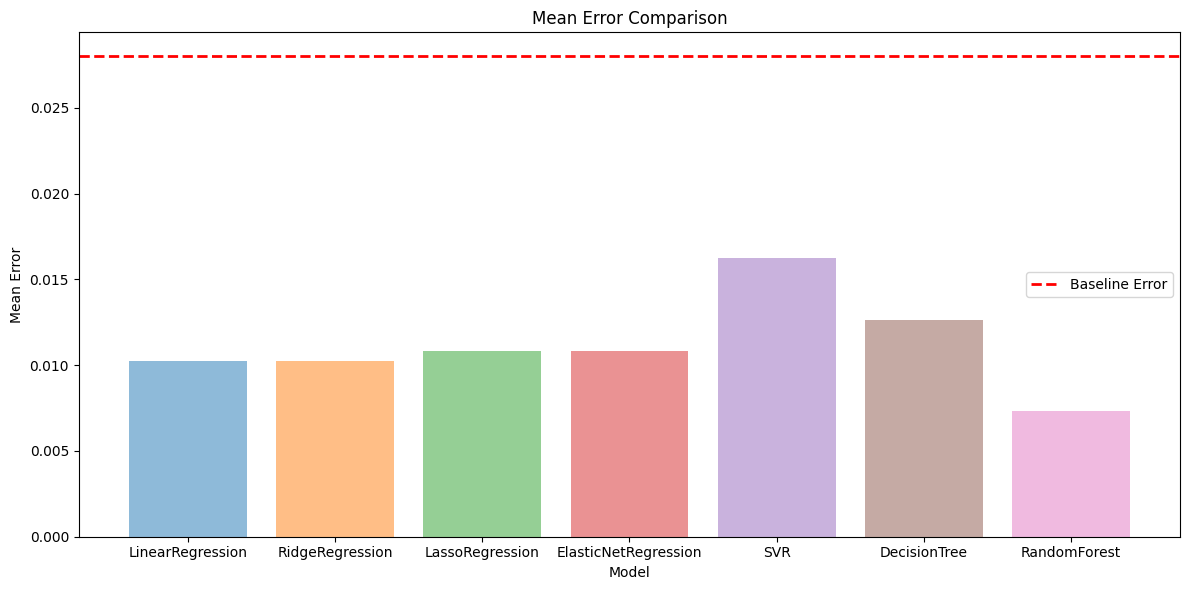

In [ ]:
import matplotlib.pyplot as plt

model_names = ['LinearRegression', 'RidgeRegression', 'LassoRegression',
               'ElasticNetRegression', 'SVR', 'DecisionTree', 'RandomForest']

fig, ax = plt.subplots()

for i in range(len(mean_error_model)):
    ax.bar(model_names[i], mean_error_model[i], alpha=0.5)

ax.axhline(mean_error_baseline, color='red', linestyle='--', linewidth=2, label='Baseline Error')

fig.set_size_inches(12, 6)

ax.set_title('Mean Error Comparison')
ax.set_xlabel('Model')
ax.set_ylabel('Mean Error')

ax.legend()
plt.tight_layout()
plt.show()

# **Cluster Method**

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

cleaned_new_data = new_data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cleaned_new_data)

eps = 5
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(scaled_data)

cluster_labels = dbscan.labels_

cleaned_new_data['Cluster'] = cluster_labels

anomalous_data = cleaned_new_data[cleaned_new_data['Cluster'] == -1]

print("Anomalous data points:")
print(anomalous_data)

Anomalous data points:
       Holiday/Weekend  % Power Outage  HourlyAltimeterSetting  \
15267                0       12.718959               29.316667   
15268                0       14.854133               29.310000   

       HourlyDewPointTemperature  HourlyDryBulbTemperature  \
15267                       72.0                      72.0   
15268                       72.0                      72.0   

       HourlySeaLevelPressure  HourlyRelativeHumidity  HourlyStationPressure  \
15267                   29.30                   100.0              29.206667   
15268                   29.31                   100.0              29.200000   

       HourlyVisibility  HourlyWetBulbTemperature  HourlyWindDirection  \
15267               4.0                      72.0                  360   
15268               5.0                      72.0                  350   

       HourlyWindSpeed  Cluster  
15267               38       -1  
15268               39       -1  


In [ ]:
num_anomalous_data = len(anomalous_data)
print("Number of anomalous data points:", num_anomalous_data)


Number of anomalous data points: 2


In [ ]:

cleaned_data_without_anomalies = cleaned_new_data[cleaned_new_data['Cluster'] != -1]


In [ ]:
cleaned_data_without_anomalies

,Holiday/Weekend,% Power Outage,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlySeaLevelPressure,HourlyRelativeHumidity,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindSpeed,Cluster
0,1,0.000987,30.14,67.0,69.0,30.14,93.0,30.030,9.97,68.0,120,9,0
1,1,0.000658,30.14,67.0,68.0,30.14,96.0,30.030,10.00,67.0,140,8,0
2,1,0.000329,30.14,67.0,68.0,30.14,96.0,30.030,10.00,67.0,130,8,0
3,1,0.000000,30.14,66.0,67.0,30.14,97.0,30.030,10.00,66.0,140,6,0
4,1,0.016954,30.15,65.0,67.0,30.14,93.0,30.030,10.00,66.0,130,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26248,1,0.001239,30.15,46.0,56.0,30.14,70.0,30.035,9.97,51.0,260,5,0
26249,1,0.002013,30.17,44.0,54.0,30.17,69.0,30.060,10.00,49.0,290,6,0
26250,1,0.006193,30.20,42.0,53.0,30.19,66.0,30.090,10.00,48.0,280,6,0
26251,1,0.001239,30.21,42.0,52.0,30.21,69.0,30.105,9.97,47.0,290,5,0


In [ ]:
cleaned_new_data['Cluster'].value_counts()

0    21914
Name: Cluster, dtype: int64

In [ ]:
combined_df = cleaned_new_data.copy()
combined_df.dropna(inplace=True)
correlation_matrix = combined_df.corr()

correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

if correlated_features:
    print("Correlated features found and dropping.")
    combined_df.drop(columns=correlated_features, inplace=True)
else:
    print("No correlated features found.")

Correlated features found and dropping.


In [ ]:
combined_df.dtypes

Holiday/Weekend                int64
% Power Outage               float64
HourlyAltimeterSetting       float64
HourlyDewPointTemperature    float64
HourlyDryBulbTemperature     float64
HourlyRelativeHumidity       float64
HourlyVisibility             float64
HourlyWindDirection            int64
HourlyWindSpeed                int64
dtype: object

In [ ]:
y_cleaned = combined_df['% Power Outage']
x_cleaned = combined_df.drop('% Power Outage', axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_cleaned, y_cleaned, test_size=0.3, random_state=42)